<a href="https://colab.research.google.com/github/anjuunni/Sample/blob/main/Framingham_HeartStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier

In [ ]:
data = pd.read_csv("framingham.csv") # Reading and converting the data into a pandas dataframe
data.shape # Calculating the dimensions of the dataset

(4240, 17)

In [ ]:
data.head()

ID  male  age  education  ...    BMI  heartRate  glucose  TenYearCHD
0   1     1   39        4.0  ...  26.97       80.0     77.0           0
1   2     0   46        2.0  ...  28.73       95.0     76.0           0
2   3     1   48        1.0  ...  25.34       75.0     70.0           0
3   4     0   61        3.0  ...  28.58       65.0    103.0           1
4   5     0   46        3.0  ...  23.10       85.0     85.0           0

[5 rows x 17 columns]

In [ ]:
!pip install pandas-profiling==2.7.1 

     |████████████████████████████████| 256kB 5.7MB/s 
     |████████████████████████████████| 1.1MB 16.3MB/s 
     |████████████████████████████████| 3.1MB 38.0MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 81kB 10.7MB/s 
     |████████████████████████████████| 296kB 40.8MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=a7f1df40a0fdfbc548e6110f26bbc49157eac14ce1f44a1c0b4253386c2cb275
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=962ffd3b72e367c7805125b4ed971389a5c1e8dca4dba719411fd8978fdc0653
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built phik htmlmin
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing i

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_file("Exploratory_DataAnalysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df= data.drop("education",axis=1)

In [ ]:
df.isnull().sum()

ID                   0
male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
for value in ['cigsPerDay','BPMeds', 'totChol','BMI','glucose','heartRate']:
    df[value].fillna((df[value].mean()),inplace=True)

In [ ]:
df.isnull().sum()

ID                 0
male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

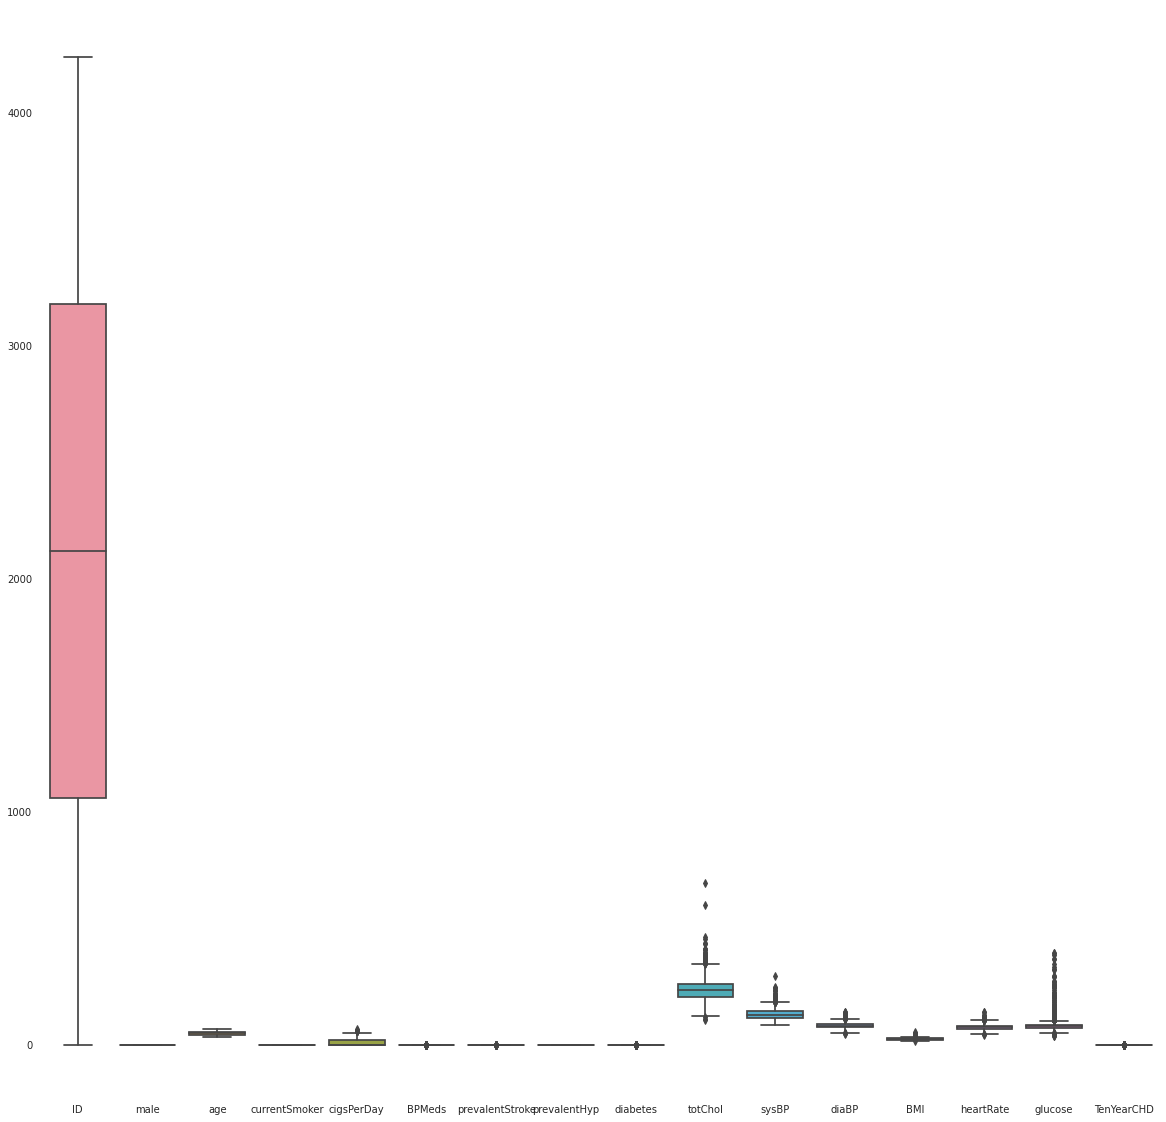

In [ ]:
plt.figure(figsize=(20,20), facecolor='w')
sns.boxplot(data=df)
plt.show()

In [ ]:
print(df['totChol'].max())
print(df['sysBP'].max())

696.0
295.0


In [ ]:
df = df[df['totChol']<600.0]
df = df[df['sysBP']<295.0]
df.shape

(4237, 16)

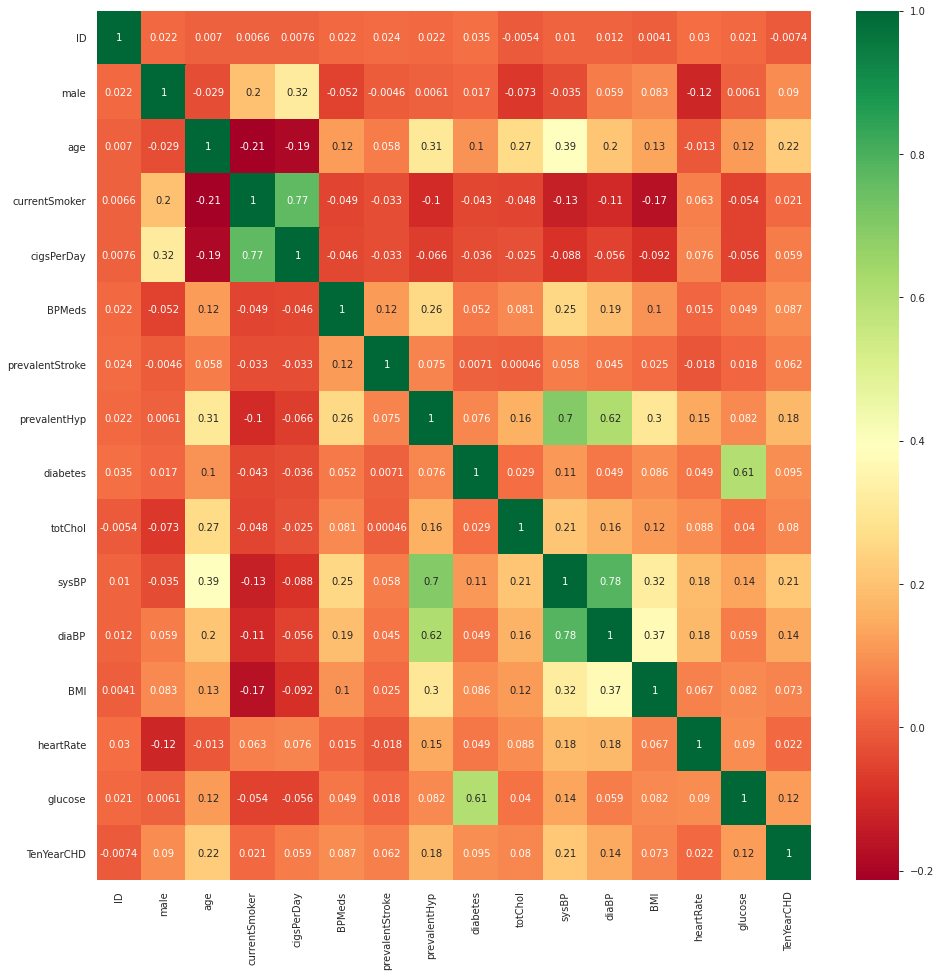

In [ ]:
fig = plt.figure(figsize=(16, 16))

fig.set_facecolor('white')

sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

In [ ]:
df=df.drop('cigsPerDay',axis=1)

In [ ]:
df.shape

(4237, 15)

In [ ]:
X = df.values[:,0:-1]
Y = df.values[:,-1]

In [ ]:
X

array([[1.000e+00, 1.000e+00, 3.900e+01, ..., 2.697e+01, 8.000e+01,
        7.700e+01],
       [2.000e+00, 0.000e+00, 4.600e+01, ..., 2.873e+01, 9.500e+01,
        7.600e+01],
       [3.000e+00, 1.000e+00, 4.800e+01, ..., 2.534e+01, 7.500e+01,
        7.000e+01],
       ...,
       [4.238e+03, 0.000e+00, 5.200e+01, ..., 2.147e+01, 8.000e+01,
        1.070e+02],
       [4.239e+03, 1.000e+00, 4.000e+01, ..., 2.560e+01, 6.700e+01,
        7.200e+01],
       [4.240e+03, 0.000e+00, 3.900e+01, ..., 2.091e+01, 8.500e+01,
        8.000e+01]])

In [ ]:
Y

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)

X = scaler.transform(X)

print(X)

[[-1.73199178  1.15295352 -1.2337712  ...  0.28833977  0.34356389
  -0.2170257 ]
 [-1.73117475 -0.86733765 -0.41715839 ...  0.72114443  1.59142375
  -0.2608489 ]
 [-1.73035773  1.15295352 -0.18384044 ... -0.11249636 -0.0723894
  -0.52378814]
 ...
 [ 1.72973816 -0.86733765  0.28279545 ... -1.06417479  0.34356389
   1.09767049]
 [ 1.73055519  1.15295352 -1.11711223 ... -0.04855931 -0.73791466
  -0.43614173]
 [ 1.73137221 -0.86733765 -1.2337712  ... -1.20188537  0.75951718
  -0.08555608]]


In [ ]:
Y.dtype

dtype('float64')

In [ ]:
Y= Y.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20,
                                                    random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
cfm_LR=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:")
print(cfm_LR)

Confusion Matrix:
[[706   7]
 [128   7]]


In [ ]:
print("Classification report: ")

print(classification_report(Y_test,Y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       713
           1       0.50      0.05      0.09       135

    accuracy                           0.84       848
   macro avg       0.67      0.52      0.50       848
weighted avg       0.79      0.84      0.78       848



In [ ]:
acc_LR=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_LR)

Accuracy of the model:  0.8408018867924528


In [ ]:
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[0.74845752 0.25154248]
 [0.72677024 0.27322976]
 [0.95494155 0.04505845]
 ...
 [0.74961105 0.25038895]
 [0.65400587 0.34599413]
 [0.74518472 0.25481528]]


In [ ]:
y_pred_class=[]                #empty list to append created values

for value in y_pred_prob[:,1]: #only column 1 not 0 from above numbers (class 1)
    if value > 0.60:           #play here with threshold (0.6 to 0.4)
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)

In [ ]:
cfm_LRT=confusion_matrix(Y_test,y_pred_class)
print("Confusion Matrix:")
print(cfm_LRT)

Confusion Matrix:
[[712   1]
 [130   5]]


In [ ]:
print(classification_report(Y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       713
           1       0.83      0.04      0.07       135

    accuracy                           0.85       848
   macro avg       0.84      0.52      0.49       848
weighted avg       0.84      0.85      0.78       848



In [ ]:
acc_LRT=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc_LRT)


Accuracy of the model:  0.8455188679245284


In [ ]:
from sklearn import metrics

fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_prob[:,1])
auc = metrics.auc(fpr,tpr)

print(auc)

0.7010648797465068


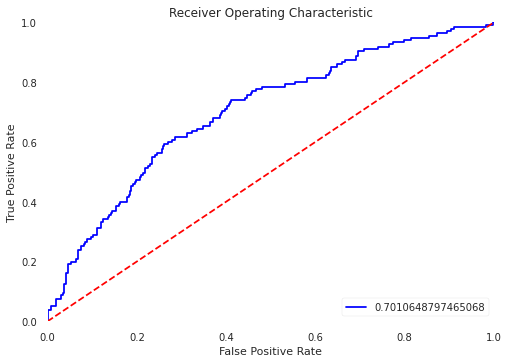

In [ ]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, 'b', label = auc) # b is blue line 
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--') # x column array, y column array,r-- red dash line 
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
classifier=SGDClassifier(loss="log",random_state=10,eta0=0.00001,alpha=0.01,max_iter=1000)

#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

In [ ]:
classifier.n_iter_

11

In [ ]:
classifier.n_iter_no_change

5

In [ ]:
classifier.early_stopping

False

In [ ]:
cfm_SGD=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ")
print(cfm_SGD)


Confusion Matrix: 
[[708   5]
 [130   5]]


In [ ]:
print("Classification report: ")

print(classification_report(Y_test,Y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       713
           1       0.50      0.04      0.07       135

    accuracy                           0.84       848
   macro avg       0.67      0.52      0.49       848
weighted avg       0.79      0.84      0.78       848



In [ ]:
acc_SGD=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_SGD)

Accuracy of the model:  0.8408018867924528


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model= SVC(kernel="rbf",gamma=0.1,C= 1.0)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)

In [ ]:
acc_SV= svc_model.score(X_train,Y_train)
print("Accuracy of the model: ",acc_SV)

Accuracy of the model:  0.8645618176453231


In [ ]:
svc_model= SVC(kernel="rbf",gamma=0.01,C= 1.0)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)

In [ ]:
acc_SV= svc_model.score(X_train,Y_train)
print("Accuracy of the model: ",acc_SV)

Accuracy of the model:  0.8527589259368545


In [ ]:
svc_model= SVC(kernel="rbf",gamma=0.001,C= 1.0)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)

In [ ]:
acc_SV= svc_model.score(X_train,Y_train)
print("Accuracy of the model: ",acc_SV)

Accuracy of the model:  0.8503983475951609


In [ ]:
svc_model= SVC(kernel="rbf",gamma=0.1,C= 80)
svc_model.fit(X_train,Y_train)
Y_pred= svc_model.predict(X_test)

In [ ]:
acc_SV= svc_model.score(X_train,Y_train)
print("Accuracy of the model: ",acc_SV)

Accuracy of the model:  0.9619356742401889


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_KNN= KNeighborsClassifier(n_neighbors= int(np.sqrt(len(X_train))),
                                    metric= 'euclidean')
model_KNN.fit(X_train,Y_train)

Y_pred= model_KNN.predict(X_test)

In [ ]:
cfm_KNN=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ")
print(cfm_KNN)
print()

Confusion Matrix: 
[[713   0]
 [135   0]]



In [ ]:
print("Classification report: ")

print(classification_report(Y_test,Y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       713
           1       0.00      0.00      0.00       135

    accuracy                           0.84       848
   macro avg       0.42      0.50      0.46       848
weighted avg       0.71      0.84      0.77       848



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
acc_KNN=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_KNN)

Accuracy of the model:  0.8408018867924528


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_DecisionTree= DecisionTreeClassifier(criterion= "gini",random_state=10)

model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
Y_pred= model_DecisionTree.predict(X_test)

In [ ]:
cfm_KNN=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ")
print(cfm_KNN)
print()


Confusion Matrix: 
[[669  44]
 [121  14]]



In [ ]:
print("Classification report: ")

print(classification_report(Y_test,Y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       713
           1       0.23      0.26      0.24       135

    accuracy                           0.75       848
   macro avg       0.54      0.55      0.55       848
weighted avg       0.76      0.75      0.75       848



In [ ]:
acc_DT=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_DT)

Accuracy of the model:  0.7452830188679245


In [ ]:
model_DecisionTree= DecisionTreeClassifier(criterion= "gini",min_samples_leaf= 3,max_depth=10,random_state=10)

In [ ]:
model_DecisionTree.fit(X_train,Y_train)
Y_pred= model_DecisionTree.predict(X_test)

In [ ]:
cfm_DT1=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ")
print(cfm_DT1)

Confusion Matrix: 
[[669  44]
 [121  14]]


In [ ]:
print("Classification report: ")

print(classification_report(Y_test,Y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       713
           1       0.24      0.10      0.15       135

    accuracy                           0.81       848
   macro avg       0.54      0.52      0.52       848
weighted avg       0.75      0.81      0.77       848



In [ ]:
acc_DT1=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_DT1)

Accuracy of the model:  0.8054245283018868


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model= RandomForestClassifier(n_estimators=101, random_state=10)

model= model.fit(X_train,Y_train)

Y_pred= model.predict(X_test)

In [ ]:
cfm_RF=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix: ")
print(cfm_RF)
print()

Confusion Matrix: 
[[704   9]
 [130   5]]



In [ ]:
print("Classification report: ")

print(classification_report(Y_test,Y_pred))

Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       713
           1       0.36      0.04      0.07       135

    accuracy                           0.84       848
   macro avg       0.60      0.51      0.49       848
weighted avg       0.77      0.84      0.78       848



In [ ]:
acc_RF=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_RF)

Accuracy of the model:  0.8360849056603774


In [ ]:
model_eval = pd.DataFrame({'Model': ['Logistic Regression','K-Nearest Neighbour','SGD',
                                   'SVM','Decision Tree','Random Forrest'], 
                         'Accuracy': [acc_LR*100, acc_KNN*100, 
                                      acc_SGD*100,acc_SV*100,acc_DT*100,acc_RF*100]})
model_eval

Model   Accuracy
0  Logistic Regression  84.080189
1  K-Nearest Neighbour  84.080189
2                  SGD  84.080189
3                  SVM  96.193567
4        Decision Tree  74.528302
5       Random Forrest  83.608491

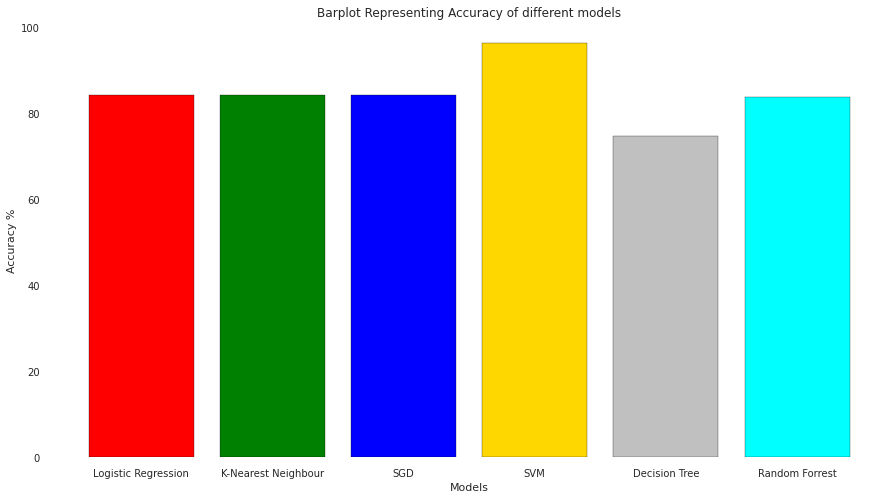

In [ ]:
colors = ['red','green','blue','gold','silver','cyan']
plt.figure(figsize=(15,8), facecolor='w')
plt.title("Barplot Representing Accuracy of different models")
plt.ylabel("Accuracy %")
plt.xlabel("Models")
plt.bar(model_eval['Model'],model_eval['Accuracy'],color=colors,edgecolor='black')
plt.show()